Iteration 1: Cost 4291.736823402729, Weights [0.1 0.2], Bias 0.01
Iteration 2: Cost 1095.9562184568244, Weights [0.75464113 0.23006523], Bias 0.02279478130709
Iteration 3: Cost 335.7882687651878, Weights [1.07391879 0.2447466 ], Bias 0.029031761389991036
Iteration 4: Cost 154.9700565356563, Weights [1.2296346  0.25192501], Bias 0.03207040219193254
Iteration 5: Cost 111.95951974850504, Weights [1.3055788  0.25544412], Bias 0.033549164386692434
Iteration 6: Cost 101.72876032746694, Weights [1.34261717 0.25717853], Bias 0.034267150159345894
Iteration 7: Cost 99.29519943540718, Weights [1.36068058 0.25804252], Bias 0.03461409379672015
Iteration 8: Cost 98.71632792203842, Weights [1.36948962 0.25848199], Bias 0.03478007463680769
Iteration 9: Cost 98.57862417970517, Weights [1.37378515 0.25871441], Bias 0.034857797263095854
Iteration 10: Cost 98.54585930496302, Weights [1.37587938 0.25884585], Bias 0.034892475110616675
Iteration 11: Cost 98.53805583238142, Weights [1.3769     0.25892804], Bi

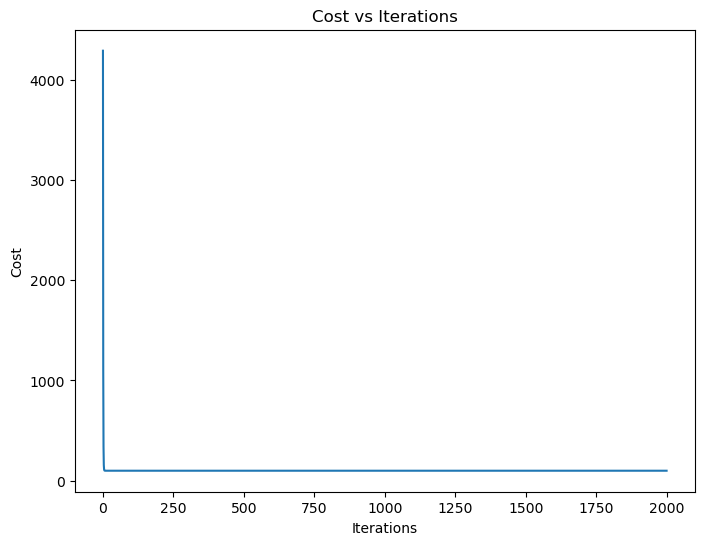

Estimated Weights: [1.37499441 0.32692157]
Estimated Bias: 0.02273956186633367


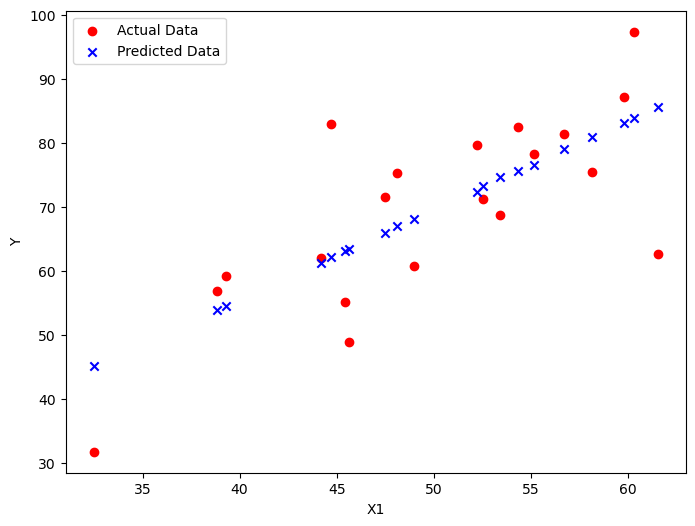

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
    # Calculating the mean squared error (MSE)
    cost = np.sum((y_true - y_predicted)**2) / len(y_true)
    return cost

def gradient_descent(X1, X2, y, iterations=1000, learning_rate=0.0001, stopping_threshold=1e-6):
    current_weights = np.array([0.1, 0.2])  # Initialize weights
    current_bias = 0.01                     # Initialize bias
    n = float(len(X1))                      # Number of data points
    costs = []                              # List to store costs over iterations
    weights = []                            # List to store weights over iterations
    previous_cost = None                    # Variable to track previous cost
    
    for i in range(iterations):
        y_predicted = (current_weights[0] * X1) + (current_weights[1] * X2) + current_bias  # Predicted values
        
        current_cost = mean_squared_error(y, y_predicted)  # Calculate current MSE
        
        # Check if the change in cost is within stopping threshold
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break
        
        previous_cost = current_cost  # Update previous cost
        
        costs.append(current_cost)   # Append current cost to costs list
        weights.append(current_weights)  # Append current weights to weights list
        
        # Print parameters for each iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weights {current_weights}, Bias {current_bias}")
        
        # Calculate derivatives for gradient update
        weight1_derivative = -(2/n) * np.sum(X1 * (y - y_predicted))
        weight2_derivative = -(2/n) * np.sum(X2 * (y - y_predicted))
        bias_derivative = -(2/n) * np.sum(y - y_predicted)
        
        # Update weights and bias using gradient descent
        current_weights[0] = current_weights[0] - (learning_rate * weight1_derivative)
        current_weights[1] = current_weights[1] - (learning_rate * weight2_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
        
    # Visualize cost vs weights
    plt.figure(figsize=(8, 6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()
    
    return current_weights, current_bias

def main():
    # Data with two input features
    X1 = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
                   55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                   45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
                   48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    
    X2 = np.array([1.2, 3.5, 2.8, 1.9, 2.5, 2.0, 1.7, 1.4, 2.5, 2.8,
                   2.0, 2.7, 1.6, 2.9, 3.1, 2.2, 2.3, 3.0, 1.8, 1.5])
    
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
    
    # Estimating weights and bias using gradient descent
    estimated_weights, estimated_bias = gradient_descent(X1, X2, Y, iterations=2000)
    print(f"Estimated Weights: {estimated_weights}\nEstimated Bias: {estimated_bias}")
    
    # Making predictions using estimated parameters
    Y_pred = estimated_weights[0] * X1 + estimated_weights[1] * X2 + estimated_bias
    
    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X1, Y, marker='o', color='red', label='Actual Data')
    plt.scatter(X1, Y_pred, marker='x', color='blue', label='Predicted Data')
    plt.xlabel("X1")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
